<a href="https://colab.research.google.com/github/benku123/Statistics_Python/blob/main/Analyse_USelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind 
import os

In [ ]:
df = pd.read_csv("/content/sample_data/US_Election.csv", encoding="ISO-8859-1")

In [ ]:
print(df.columns)

Index(['state', 'county', 'current_votes', 'total_votes', 'percent'], dtype='object')


In [ ]:
#dataset of US election of votes for different counties in different states
df

,state,county,current_votes,total_votes,percent
0,Delaware,Kent County,85415,87025,100
1,Delaware,New Castle County,280039,287633,100
2,Delaware,Sussex County,127181,129352,100
3,Indiana,Adams County,14154,14209,100
4,Indiana,Allen County,168312,169082,100
...,...,...,...,...,...
1020,West Virginia,Webster County,3339,3402,100
1021,West Virginia,Wetzel County,6553,6667,100
1022,West Virginia,Wirt County,2544,2653,100
1023,West Virginia,Wood County,38435,38762,100


In [ ]:
df.describe()

,current_votes,total_votes,percent
count,1.025000e+03,1.025000e+03,1025.000000
mean,1.992216e+04,2.010267e+04,99.887805
std,6.505975e+04,6.560663e+04,0.980323
min,5.000000e+00,5.000000e+00,80.000000
25%,1.089000e+03,1.109000e+03,100.000000
50%,3.778000e+03,3.844000e+03,100.000000
75%,1.323000e+04,1.341400e+04,100.000000
max,1.198049e+06,1.210507e+06,100.000000


In [ ]:
df["state"]

0            Delaware
1            Delaware
2            Delaware
3             Indiana
4             Indiana
            ...      
1020    West Virginia
1021    West Virginia
1022    West Virginia
1023    West Virginia
1024    West Virginia
Name: state, Length: 1025, dtype: object

In [ ]:
#a summary of the states and their votes
state_totals = df.groupby('state')['current_votes','total_votes'].agg('sum')

state_totals['turnout_rate']=state_totals['current_votes'] / state_totals['total_votes']

display(state_totals)

<ipython-input-34-6ae288892f3b>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  state_totals = df.groupby('state')['current_votes','total_votes'].agg('sum')


,current_votes,total_votes,turnout_rate
state,,,
Delaware,492635,504010,0.977431
Indiana,3020383,3034614,0.995310
Missouri,3012274,3029496,0.994315
Montana,603587,606562,0.995095
New Hampshire,792804,806412,0.983125
North Carolina,5502777,5525201,0.995942
North Dakota,340121,361956,0.939675
Utah,1458878,1487677,0.980642
Vermont,362711,367076,0.988109


In [ ]:
#the states with highest and lowest votes
max_current_votes = state_totals.loc[state_totals['current_votes'].idxmax()]
min_current_votes = state_totals.loc[state_totals['current_votes'].idxmax()]

max_total_votes = state_totals.loc[state_totals['total_votes'].idxmax()]
min_total_votes = state_totals.loc[state_totals['total_votes'].idxmax()]

max_turnout_rate = state_totals.loc[state_totals['turnout_rate'].idxmax()]
min_turnout_rate = state_totals.loc[state_totals['turnout_rate'].idxmax()]

#a new dataframe to show the results
results = pd.DataFrame({'metric':['current_votes','']})

<ipython-input-36-626cfa91e737>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="state",y="current_votes",data=df,ci=None)


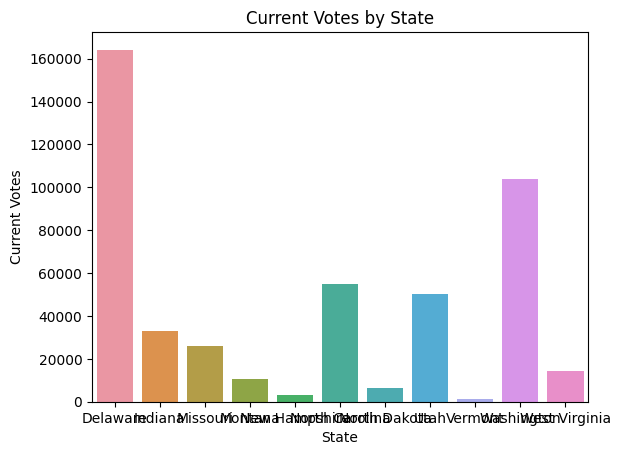

In [ ]:
#barplot of current votes by state
sns.barplot(x="state",y="current_votes",data=df,ci=None)

plt.xlabel("State")
plt.ylabel("Current Votes")
plt.title("Current Votes by State")

plt.show()

In [ ]:
#correlation btw curr votes total and
corr_matrix = df[['current_votes','total_votes','percent']].corr()

print(corr_matrix)

In [ ]:
#point estimation of turnout rate
population = df["percent"]

n = 110

sample_means = []
for state in df["state"].unique():
  sample = df.loc[df["state"] == state, "percent"].sample(n=10,replace=True)
  sample_means.append(sample.mean())

populationn_mean = df["percent"].mean()

sample_mean = np.mean(sample_means)

print("population turnout rate mean:", populationn_mean)
print("sample turnout rate mean:", sample_mean)

population turnout rate mean: 99.88780487804878
sample turnout rate mean: 99.9090909090909


In [ ]:
group1 = df[df["state"] == "Washington"]["current_votes"]
group2 = df[df["state"] == "Delaware"]["current_votes"]

t_stat,p_value = ttest_ind(group1,group2)

print("t-stat", t_stat)
print("p-val", p_value)

alpha = 0.05
if p_value<alpha:
  print("Reject null hypothesis")
else:
  print("Fail to reject")

t-stat -0.4849091854397605
p-val 0.6303858628753031
Fail to reject


In [ ]:
#mannually mean of current votes of different states
state_mean_current_votes = df.groupby("state")["current_votes"].mean()
print(state_mean_current_votes)

state
Delaware          164211.666667
Indiana            32830.250000
Missouri           26193.686957
Montana            10778.339286
New Hampshire       3345.164557
North Carolina     55027.770000
North Dakota        6417.377358
Utah               50306.137931
Vermont             1474.434959
Washington        104011.641026
West Virginia      14137.945455
Name: current_votes, dtype: float64
